# Import Data Set

In [1]:
import pandas as pd
data = pd.read_csv("WC_AT.csv")
data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [27]:
data[:]

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [20]:
data.AT

0       25.72
1       25.89
2       42.60
3       42.80
4       29.84
        ...  
104    124.00
105     62.20
106    133.00
107    208.00
108    208.00
Name: AT, Length: 109, dtype: float64

In [26]:
data['AT']

0       25.72
1       25.89
2       42.60
3       42.80
4       29.84
        ...  
104    124.00
105     62.20
106    133.00
107    208.00
108    208.00
Name: AT, Length: 109, dtype: float64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


# Correlation

In [6]:
data.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


/home/sachin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Waist', ylabel='Density'>

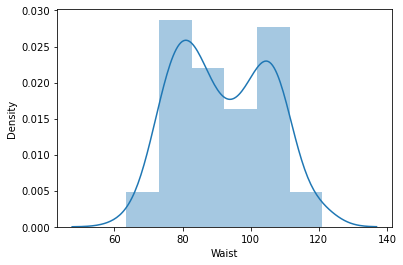

In [7]:
import seaborn as sns
sns.distplot(data['Waist'])

/home/sachin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AT', ylabel='Density'>

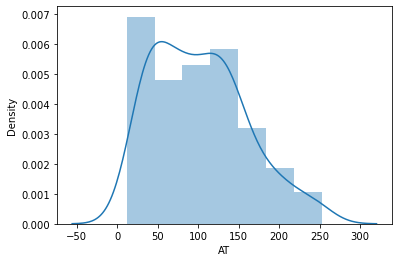

In [8]:
import seaborn as sns
sns.distplot(data['AT'])

Fitting a Linear Regression Model

In [9]:
import statsmodels.formula.api as smf
model = smf.ols("AT~Waist",data = data).fit()   #AT = y, Waist= x

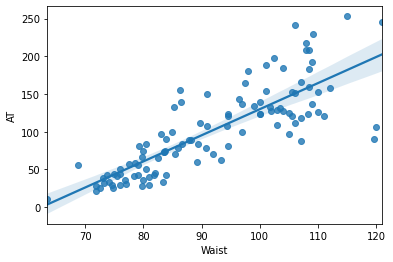

In [10]:
sns.regplot(x="Waist", y="AT", data=data);

In [12]:
#Coefficients
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [13]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    #pvlaues< 5% to accept the model

Intercept    -9.909103
Waist        14.740376
dtype: float64 
 Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


In [14]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6700368930528429, 0.6669531256981966)

# Predict for new data point

In [16]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([75, 40, 200])

In [17]:
data_pred=pd.DataFrame(newdata,columns=['Waist'])

In [18]:
data_pred

,Waist
0,75
1,40
2,200


In [19]:
model.predict(data_pred)   #40 and the 200 is out of the  range so we cant use the regression model for these two values. 

0     43.432966
1    -77.627112
2    475.790390
dtype: float64